# Seismic indexing

See papers at ageo.co/seismic-indexing

May use [this code](http://stackoverflow.com/a/12254938/3381305) which is in `/src`.

Other interesting things:
- Scikit-image: http://scikit-image.org/docs/dev/auto_examples/plot_template.html
- OpenCV, basic: http://docs.opencv.org/3.1.0/d4/dc6/tutorial_py_template_matching.html
- OpenCV, multiscale: http://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/

Image search engines:
- http://www.pyimagesearch.com/2014/12/01/complete-guide-building-image-search-engine-python-opencv/
- http://yael.gforge.inria.fr/tutorial/tuto_imgindexing.html
- fire-cbir: https://github.com/deselaers/fire-cbir
- ISKdemon: https://github.com/ricardocabral/iskdaemon

SIFT in Python
- https://ianlondon.github.io/blog/how-to-sift-opencv/
- OpenCV: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html
- RootSift: http://www.pyimagesearch.com/2015/04/13/implementing-rootsift-in-python-and-opencv/


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import skimage
skimage.__version__

'0.12.3'

In [7]:
volume = np.load('../data/F3_volume_3x3_16bit.npy')

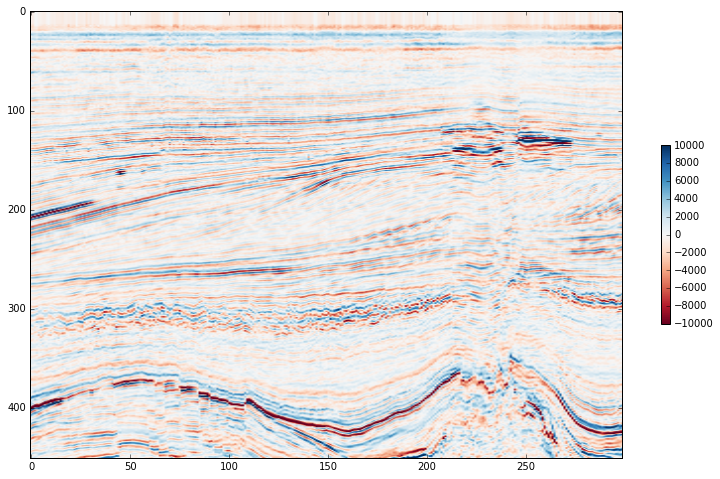

In [8]:
plt.figure(figsize=(14,8))
plt.imshow(volume[5].T, aspect=0.5, cmap="RdBu", clim=[-1e4, 1e4])
plt.colorbar(shrink=0.4)
plt.show()

## Using `scipy.correlate2d` directly

Per [the docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d).

First, find it in the 2D image.

In [32]:
from scipy import misc

img = volume[5].T.astype(float)
template = np.copy(img[120:145, 240:280])  # Anomaly.
template -= template.mean()
img = img + np.random.randn(*img.shape) * 50  # Add noise.
corr = signal.correlate2d(img, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)

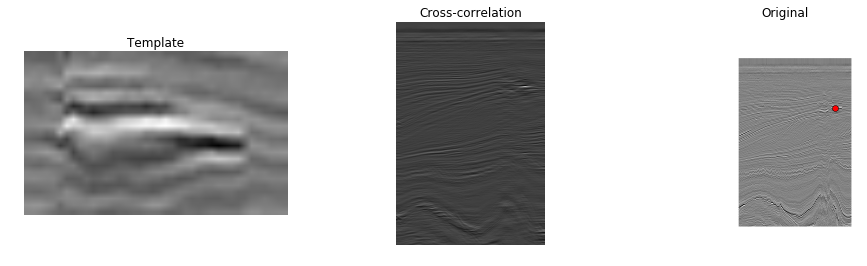

In [35]:
fig, (ax_template, ax_corr, ax_orig) = plt.subplots(1, 3, figsize=(16, 4))

ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()

ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

ax_orig.imshow(img, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_orig.plot(x, y, 'ro')

plt.show()

### Find in a different line.

In [50]:
from scipy import misc

img = volume[50].T.astype(float)
template = np.copy(volume[5].T.astype(float)[120:145, 240:280])  # Anomaly.
template -= template.mean()
img = img + np.random.randn(*img.shape) * 50  # Add noise.
corr = signal.correlate2d(img, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)

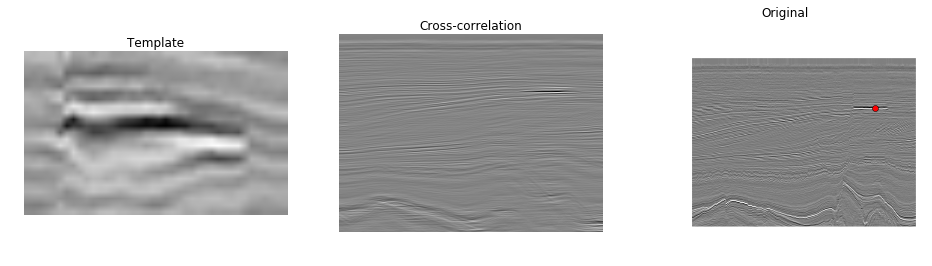

In [55]:
fig, (ax_template, ax_corr, ax_orig) = plt.subplots(1, 3, figsize=(16, 4))

ax_template.imshow(template, cmap='Greys')
ax_template.set_title('Template')
ax_template.set_axis_off()

ax_corr.imshow(corr, cmap='Greys', aspect=0.5)
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

ax_orig.imshow(img, cmap='Greys', aspect=0.5)
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_orig.plot(x, y, 'ro')

plt.show()

### Find in the volume

In [88]:
from scipy import misc

template = np.copy(volume[20].T.astype(float)[120:145, 240:280])  # Anomaly.
template -= template.mean()

corr = []
for img in volume.astype(float):
    img = img + np.random.randn(*img.shape) * 50  # Add noise.
    corr.append(signal.correlate2d(img, template, boundary='symm', mode='same'))
    
corr = np.array(corr)

In [77]:
# Instead of loop:
# Should be able to apply_along_axis() with lambda ?

In [89]:
x, y, z = np.unravel_index(np.argmax(corr), corr.shape)

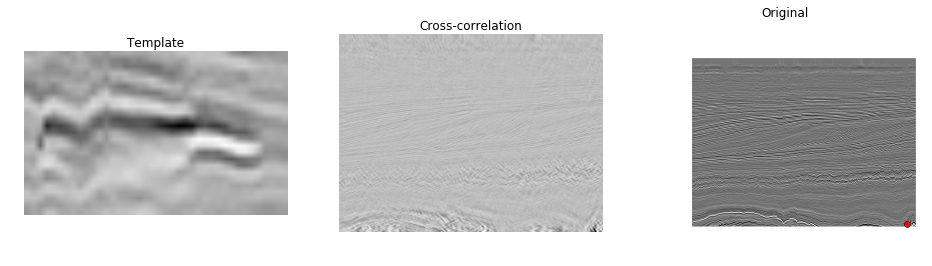

In [90]:
fig, (ax_template, ax_corr, ax_orig) = plt.subplots(1, 3, figsize=(16, 4))

ax_template.imshow(template, cmap='Greys')
ax_template.set_title('Template')
ax_template.set_axis_off()

ax_corr.imshow(corr[x].T, cmap='Greys', aspect=0.5)
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

ax_orig.imshow(volume[x].T, cmap='Greys', aspect=0.5)
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_orig.plot(y, z, 'ro')

plt.show()

## OpenCV

In [3]:
import cv2  
import numpy as np  
image = cv2.imread("Large.png")  
template = cv2.imread("small.png")  
result = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)  
print(np.unravel_index(result.argmax(),result.shape))

ImportError: No module named 'cv2'